**深度学习**称作端到端的学习, End-To-End Machine Leaning, **从原始数据中获得目标结果**

## 均方误差

In [94]:
# mean squared error
import numpy as np
def mean_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))

0.10250000000000002
0.6024999999999999


## 交叉熵误差

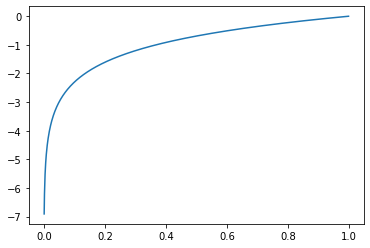

In [95]:
# cross entropy error
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.001, 1, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.show()

In [96]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## mini batch

In [97]:
import sys, os
sys.path.append('SourceCode')
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [98]:
train_size = x_train.shape[0]
batch_size = 10
print('train_size:%d, batch_size:%d' % (train_size, batch_size))

train_size:60000, batch_size:10


In [99]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[20977 16534 46525 49103 45125 13168 10485  6086  2701 12762]


In [100]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape, '\n',  t_batch.shape)

(10, 784) 
 (10, 10)


In [101]:
# mini-batch 交叉熵误差
# one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
cross_entropy_error(t_batch, t_batch)

-9.999999505838706e-08

In [102]:
# 非one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
batch_size = 10
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
print(np.arange(batch_size))

[0 1 2 3 4 5 6 7 8 9]


In [103]:
t_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [104]:
t_train[np.arange(batch_size)]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# 数值微分

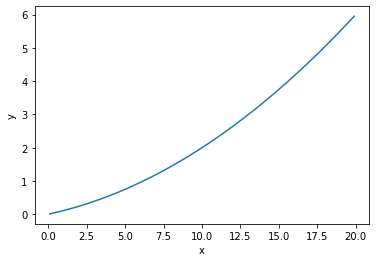

In [110]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)


# derivate is 0.02x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [111]:
numerial_diff(function_1, 5)

0.1999999999990898

In [112]:
numerial_diff(function_1, 10)

0.2999999999986347

In [116]:
def tangent_line(f, x):
    d = numerical_diff(f, x)    
    y = f(x) - d*x
    return lambda t: d*t + y
tf = tangent_line(function_1, 5)
y1 = tf(x)

array([-0.23, -0.21, -0.19, -0.17, -0.15, -0.13, -0.11, -0.09, -0.07,
       -0.05, -0.03, -0.01,  0.01,  0.03,  0.05,  0.07,  0.09,  0.11,
        0.13,  0.15,  0.17,  0.19,  0.21,  0.23,  0.25,  0.27,  0.29,
        0.31,  0.33,  0.35,  0.37,  0.39,  0.41,  0.43,  0.45,  0.47,
        0.49,  0.51,  0.53,  0.55,  0.57,  0.59,  0.61,  0.63,  0.65,
        0.67,  0.69,  0.71,  0.73,  0.75,  0.77,  0.79,  0.81,  0.83,
        0.85,  0.87,  0.89,  0.91,  0.93,  0.95,  0.97,  0.99,  1.01,
        1.03,  1.05,  1.07,  1.09,  1.11,  1.13,  1.15,  1.17,  1.19,
        1.21,  1.23,  1.25,  1.27,  1.29,  1.31,  1.33,  1.35,  1.37,
        1.39,  1.41,  1.43,  1.45,  1.47,  1.49,  1.51,  1.53,  1.55,
        1.57,  1.59,  1.61,  1.63,  1.65,  1.67,  1.69,  1.71,  1.73,
        1.75,  1.77,  1.79,  1.81,  1.83,  1.85,  1.87,  1.89,  1.91,
        1.93,  1.95,  1.97,  1.99,  2.01,  2.03,  2.05,  2.07,  2.09,
        2.11,  2.13,  2.15,  2.17,  2.19,  2.21,  2.23,  2.25,  2.27,
        2.29,  2.31,

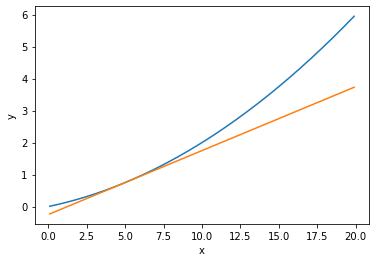

In [117]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.plot(x, y1)
plt.show()
